## Data Analysis on customer Reviews of British Airways

In [7]:
df = pd.read_csv("data/BA_reviews.csv") # read in the data

In [8]:
df.head(10) # show the first 10 rows

,Unnamed: 0,reviews
0,0,"Not Verified | Before my flight, I was forced ..."
1,1,✅ Trip Verified | British Airways at its bes...
2,2,✅ Trip Verified | An excellent flight! Despite...
3,3,✅ Trip Verified | I recently traveled with Bri...
4,4,✅ Trip Verified | My family and I were booke...
5,5,Not Verified | We had to change from AA to BA...
6,6,✅ Trip Verified | After paying $6500 for ticke...
7,7,✅ Trip Verified | An excellent flight on BA Ci...
8,8,✅ Trip Verified | Crew were amazing and atte...
9,9,Not Verified | I flew internationally for the...


In [9]:
df.describe()   # show summary statistics

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [10]:
df.info()   # show data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
df.columns      # show column names

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [12]:
df = df.rename(columns={'Unnamed: 0': 'ID'}) # rename the first column

In [13]:
df

,ID,reviews
0,0,"Not Verified | Before my flight, I was forced ..."
1,1,✅ Trip Verified | British Airways at its bes...
2,2,✅ Trip Verified | An excellent flight! Despite...
3,3,✅ Trip Verified | I recently traveled with Bri...
4,4,✅ Trip Verified | My family and I were booke...
...,...,...
995,995,✅ Trip Verified | London to Seoul. Nightmare e...
996,996,Not Verified | London to Vancouver. Economy w...
997,997,❎ Not Verified | Newcastle to Delhi via London...
998,998,✅ Trip Verified | Miami to Delhi via London. ...


## Data Cleaning and Prepocessing

In [14]:
import re   # import the regular expression library
import nltk # import the natural language toolkit
from nltk.corpus import stopwords   # import the stopwords
from nltk.tokenize import word_tokenize  # import the word tokenizer
from nltk.stem import WordNetLemmatizer # import the lemmatizer

In [15]:
nltk.download('stopwords')      # download the stopwords
nltk.download('punkt')          # download the tokenizer
nltk.download('wordnet')        # download the lemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Deep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
def clean_text(text):
    text = re.sub(r'^.*\|', '', text).strip()   # Remove the first part of the string
    text = re.sub(r'[^\w\s]', '', text.lower())     # Remove punctuation and lowercase
    words = word_tokenize(text)  # Tokenize the text
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()    # Initialize the lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize the words
    return ' '.join(words)  # Join the words back into a string

In [17]:
df['cleaned_review'] = df['reviews'].apply(clean_text)  # Apply the function to the reviews column

In [18]:
print(df['cleaned_review'].head())  # Show the first 5 cleaned reviews

0    flight forced ground staff check new expensive...
1    british airway best outstanding service flight...
2    excellent flight despite 45 hour flight a320 c...
3    recently traveled british airway mixed experie...
4    family booked leave london hong kong 2 august ...
Name: cleaned_review, dtype: object


## Sentiment Analysis

In [19]:
from textblob import TextBlob   # import the textblob library

In [20]:
def get_sentiment(text):    # Define a function to get the sentiment of a text
    return TextBlob(text).sentiment.polarity    # Return the polarity of the text

In [21]:
df['sentiment'] = df['cleaned_review'].apply(get_sentiment) # Apply the function to the cleaned reviews

In [22]:
df

,ID,reviews,cleaned_review,sentiment
0,0,"Not Verified | Before my flight, I was forced ...",flight forced ground staff check new expensive...,-0.143357
1,1,✅ Trip Verified | British Airways at its bes...,british airway best outstanding service flight...,0.500833
2,2,✅ Trip Verified | An excellent flight! Despite...,excellent flight despite 45 hour flight a320 c...,0.302498
3,3,✅ Trip Verified | I recently traveled with Bri...,recently traveled british airway mixed experie...,-0.049405
4,4,✅ Trip Verified | My family and I were booke...,family booked leave london hong kong 2 august ...,-0.187500
...,...,...,...,...
995,995,✅ Trip Verified | London to Seoul. Nightmare e...,london seoul nightmare experience british airw...,-0.048214
996,996,Not Verified | London to Vancouver. Economy w...,london vancouver economy lot cramped expected ...,0.250000
997,997,❎ Not Verified | Newcastle to Delhi via London...,newcastle delhi via london checkin charged car...,-0.060000
998,998,✅ Trip Verified | Miami to Delhi via London. ...,miami delhi via london ba business class flew ...,-0.163095


In [23]:
# Create a new column with the sentiment label based on the sentiment score
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.15 else ('negative' if x < -0.15 else 'neutral'))

In [24]:
# Print the counts of each sentiment label
print(df['sentiment_label'].value_counts())

sentiment_label
neutral     568
positive    313
negative    119
Name: count, dtype: int64


## Sentiment Analysis with Visualization

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Deep\AppData\Local\Temp\ipykernel_38540\1095562218.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, order=['positive', 'neutral', 'negative'], palette='viridis')


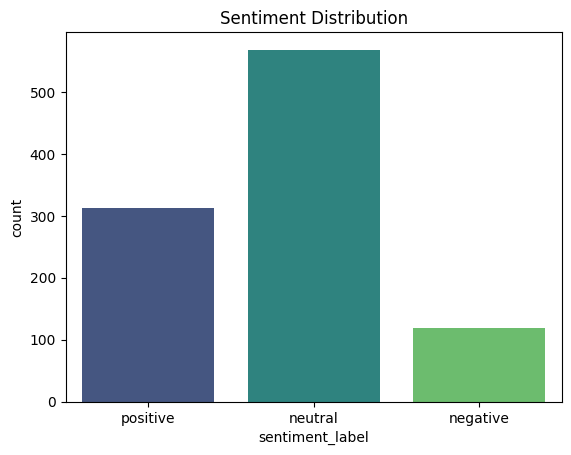

In [26]:
# Plot the sentiment distribution
sns.countplot(x='sentiment_label', data=df, order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

C:\Users\Deep\AppData\Local\Temp\ipykernel_38540\67237065.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['sentiment'], bins=20, kde=True, palette="vidiris")    # Create a histogram of the sentiment


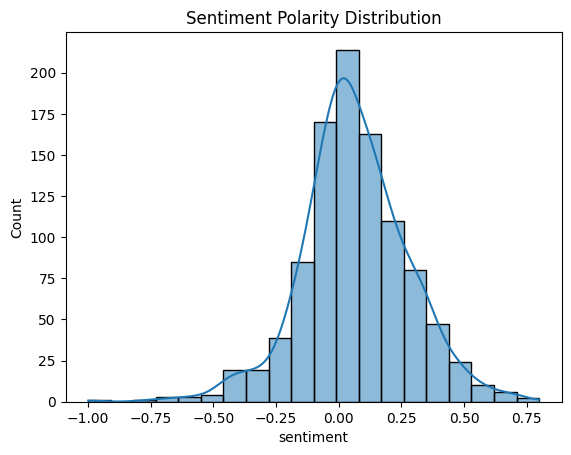

In [27]:
# Plot the sentiment polarity distribution
sns.histplot(df['sentiment'], bins=20, kde=True, palette="vidiris")    # Create a histogram of the sentiment
plt.title('Sentiment Polarity Distribution')    # Add a title
plt.show()  # Show the plot

## Making Word Clouds for Positive, Negative and Neutral

In [28]:
from wordcloud import WordCloud     # import the wordcloud library

In [29]:
positive_reviews = ' '.join(df[df['sentiment_label'] == 'positive']['cleaned_review'])  # Join all the positive reviews
negative_reviews = ' '.join(df[df['sentiment_label'] == 'negative']['cleaned_review'])  # Join all the negative reviews
neutral_reviews = ' '.join(df[df['sentiment_label'] == 'neutral']['cleaned_review'])  # Join all the neutral reviews

In [30]:
wordcloud_pos = WordCloud(width=800, height=400).generate(positive_reviews) # Create a wordcloud of the positive reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)   # Create a wordcloud of the negative reviews
wordcloud_neu = WordCloud(width=800, height=400, background_color='black').generate(neutral_reviews)    # Create a wordcloud of the neutral reviews


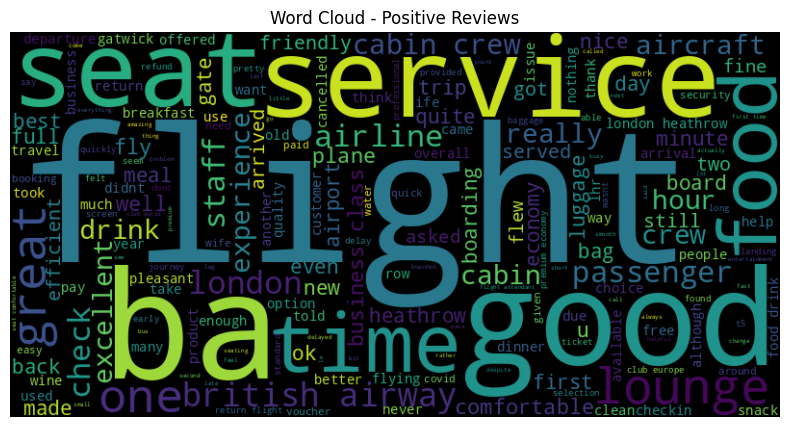

In [31]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')   # Show the positive wordcloud
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()

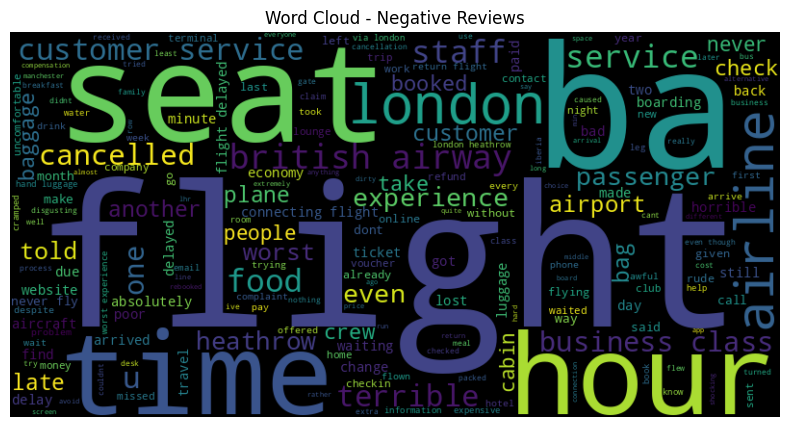

In [32]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')  # Show the negative wordcloud
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()

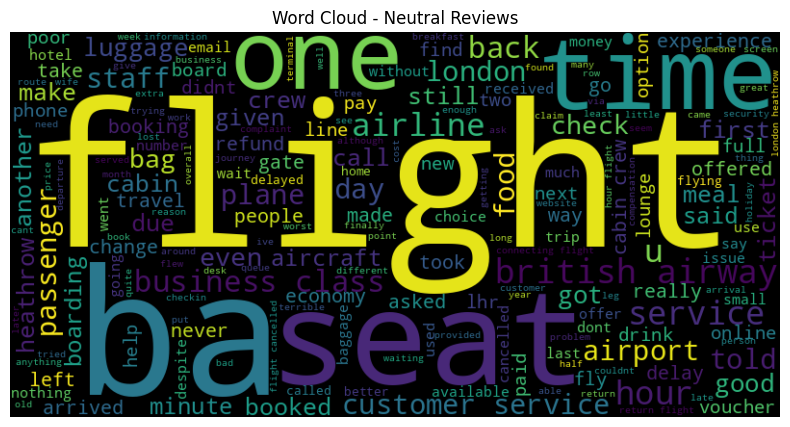

In [33]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neu, interpolation='bilinear')  # Show the neutral wordcloud
plt.title('Word Cloud - Neutral Reviews')
plt.axis('off')
plt.show()

# Using LDA to make different topics

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer   # import the TF-IDF vectorizer
from sklearn.decomposition import LatentDirichletAllocation  # import the LDA model

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')   # Initialize the TF-IDF vectorizer
tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])    # Fit and transform the data

In [36]:
lda = LatentDirichletAllocation(n_components=6, random_state=42)    # Initialize the LDA model
lda.fit(tfidf)

LatentDirichletAllocation(n_components=6, random_state=42)

In [37]:
for index, topic in enumerate(lda.components_):   # Loop through the topics
    print(f'Topic #{index+1}:') # Print the topic number
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]) # Print the top 10 words in the topic
    print('\n') # Print a newline

Topic #1:
['prague', 'dried', 'lca', 'allocated', 'pair', 'cityflyer', '747400', 'lovely', 'smiling', 'complimentary']


Topic #2:
['good', 'crew', 'class', 'london', 'hour', 'time', 'service', 'seat', 'ba', 'flight']


Topic #3:
['booked', 'customer', 'cairo', 'message', 'hang', 'pound', 'frankfurt', 'refund', 'cancelled', 'madrid']


Topic #4:
['thoroughly', 'width', 'atlantic', 'exception', 'chocolate', 'parent', 'praise', 'electronics', 'pram', 'amsterdam']


Topic #5:
['grab', 'tough', 'cookie', 'aire', 'buenos', 'meeting', 'kalamata', 'filthy', 'heart', 'wet']


Topic #6:
['frankfurt', 'slim', 'frill', 'unreliable', 'challenging', 'calgary', 'scratch', 'neighbour', 'milk', 'require']




# Visualizing data as Clusters using PCA

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [39]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review'])

In [40]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X.toarray())

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

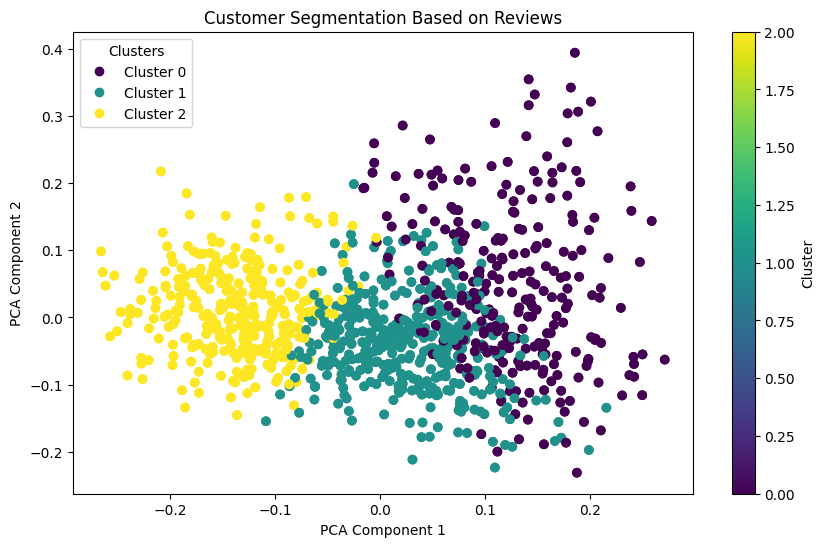

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=df['cluster'], cmap='viridis')
scatter = plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Customer Segmentation Based on Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')

# Create custom legend
handles, labels = scatter.legend_elements()
legend_labels = [f'Cluster {i}' for i in range(len(handles))]
plt.legend(handles, legend_labels, title="Clusters")
plt.show()

## Finding Most Frequent occuring Word

In [43]:
from collections import Counter

In [44]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Deep\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Deep\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Deep\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [45]:
tokens = nltk.word_tokenize(df["cleaned_review"].str.cat(sep=' '))  # Tokenize the text

In [46]:
frequency = Counter(tokens)

In [47]:
blob = TextBlob(df["cleaned_review"].str.cat(sep=' '))  # Create a textblob object
sentiment = blob.sentiment

In [48]:
tagged = nltk.pos_tag(tokens)
entities = nltk.ne_chunk(tagged)

In [49]:
print("Tokens:", tokens)
print("Frequency Analysis:", frequency)
print("Sentiment Analysis:", sentiment)
print("Named Entities:", entities)

Tokens: ['flight', 'forced', 'ground', 'staff', 'check', 'new', 'expensive', 'cabin', 'luggage', 'despite', 'fact', 'met', 'size', 'requirement', 'informed', 'plane', 'full', 'assured', 'staff', 'luggage', 'would', 'well', 'taken', 'care', 'unfortunately', 'bag', 'returned', 'scratched', 'damaged', 'completely', 'unacceptable', 'especially', 'given', 'assurance', 'received', 'lodged', 'complaint', 'fell', 'deaf', 'ear', 'acknowledgment', 'resolution', 'british', 'airway', 'funny', 'thing', 'overhead', 'locker', 'empty', 'experience', 'extremely', 'frustrating', 'disappointing', 'lack', 'care', 'customer', 'property', 'customer', 'service', 'glaring', 'british', 'airway', 'best', 'outstanding', 'service', 'flight', 'attendant', 'dinner', 'good', 'though', 'breakfast', 'could', 'better', 'excellent', 'ife', 'lie', 'flat', 'seat', 'extremely', 'comfortable', 'pleasant', 'flight', 'board', 'a350', 'excellent', 'flight', 'despite', '45', 'hour', 'flight', 'a320', 'configured', 'short', 'hop

In [50]:
most_common_words = frequency.most_common(15)
words, counts = zip(*most_common_words)

In [51]:
words

('flight',
 'ba',
 'seat',
 'service',
 'time',
 'hour',
 'london',
 'airline',
 'crew',
 'class',
 'british',
 'airway',
 'food',
 'one',
 'u')

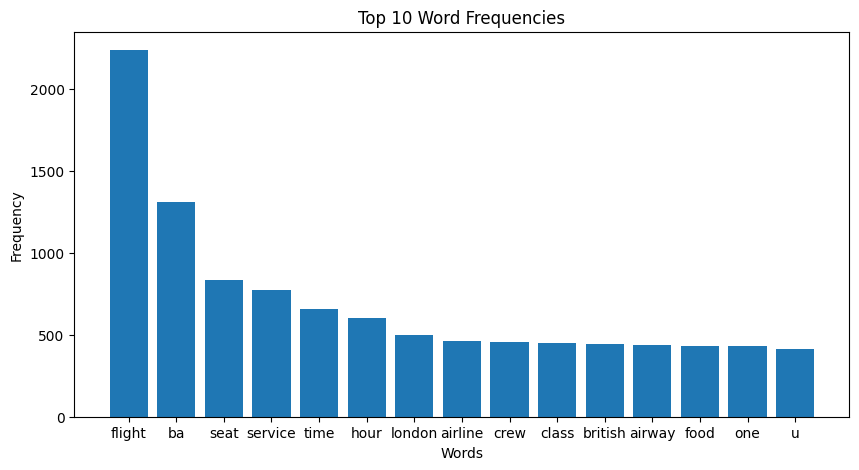

In [53]:
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies')
plt.show()